In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

import torch

In [2]:
DATA_PATH = "data/kaggle_3m/"

dirs = []
images = []
masks = []
for dirname, _, filenames in os.walk(DATA_PATH):
    for filename in filenames:
        if 'mask'in filename:
            dirs.append(dirname.replace(DATA_PATH, ''))
            masks.append(filename)
            images.append(filename.replace('_mask', ''))

In [3]:
"""
Data directory for the masks and images
Format is TCGA_<institution-code>_<patient-id>_<slice-number>.tif
Each image is a slice MRI scan of the patient's brain, with a mask showing tumor area if present
"""
masks[:5], images[:5]

(['TCGA_HT_7690_19960312_19_mask.tif',
  'TCGA_HT_7690_19960312_15_mask.tif',
  'TCGA_HT_7690_19960312_3_mask.tif',
  'TCGA_HT_7690_19960312_17_mask.tif',
  'TCGA_HT_7690_19960312_18_mask.tif'],
 ['TCGA_HT_7690_19960312_19.tif',
  'TCGA_HT_7690_19960312_15.tif',
  'TCGA_HT_7690_19960312_3.tif',
  'TCGA_HT_7690_19960312_17.tif',
  'TCGA_HT_7690_19960312_18.tif'])

In [4]:
# Amount of data we are dealing with
len(dirs), len(images), len(masks)

(3929, 3929, 3929)

In [5]:
# Create dataframe of each image location
imagePath_df = pd.DataFrame({'directory':dirs, 'images': images, 'masks': masks})
imagePath_df['image-path'] = DATA_PATH + imagePath_df['directory'] + '/' + imagePath_df['images']
imagePath_df['mask-path'] = DATA_PATH + imagePath_df['directory'] + '/' + imagePath_df['masks']
imagePath_df.head()

,directory,images,masks,image-path,mask-path
0,TCGA_HT_7690_19960312,TCGA_HT_7690_19960312_19.tif,TCGA_HT_7690_19960312_19_mask.tif,data/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7...,data/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7...
1,TCGA_HT_7690_19960312,TCGA_HT_7690_19960312_15.tif,TCGA_HT_7690_19960312_15_mask.tif,data/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7...,data/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7...
2,TCGA_HT_7690_19960312,TCGA_HT_7690_19960312_3.tif,TCGA_HT_7690_19960312_3_mask.tif,data/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7...,data/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7...
3,TCGA_HT_7690_19960312,TCGA_HT_7690_19960312_17.tif,TCGA_HT_7690_19960312_17_mask.tif,data/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7...,data/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7...
4,TCGA_HT_7690_19960312,TCGA_HT_7690_19960312_18.tif,TCGA_HT_7690_19960312_18_mask.tif,data/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7...,data/kaggle_3m/TCGA_HT_7690_19960312/TCGA_HT_7...


In [6]:
# Show image shape
imagePath = os.path.join(DATA_PATH, imagePath_df['directory'].iloc[0], imagePath_df['images'].iloc[0])
maskPath = os.path.join(DATA_PATH, imagePath_df['directory'].iloc[0], imagePath_df['masks'].iloc[0])
image = cv2.imread(imagePath)
mask = cv2.imread(maskPath)

image.shape, mask.shape

((256, 256, 3), (256, 256, 3))

In [7]:
def plot_image(i):

    imagePath = os.path.join(DATA_PATH, imagePath_df['directory'].iloc[i], imagePath_df['images'].iloc[i])
    maskPath = os.path.join(DATA_PATH, imagePath_df['directory'].iloc[i], imagePath_df['masks'].iloc[i])
    
    image = cv2.imread(imagePath)
    mask = cv2.imread(maskPath)
    
    fig, axs = plt.subplots(1,3, figsize=[13,15])
    
    axs[0].imshow(image)
    axs[0].set_title('Brain MRI')
    
    axs[1].imshow(mask)
    axs[1].set_title('Mask')
    
    axs[2].imshow(image)
    axs[2].imshow(mask, alpha=0.3)
    axs[2].set_title('MRI with mask')
    
    plt.grid(False)
    plt.show()

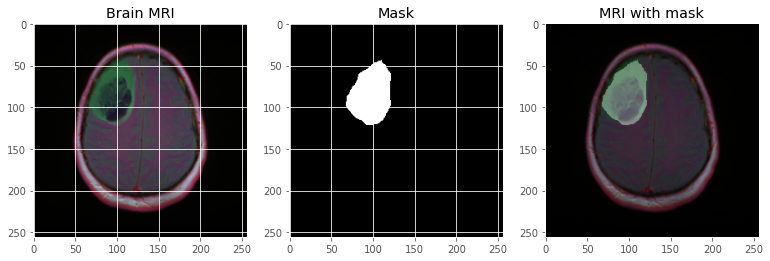

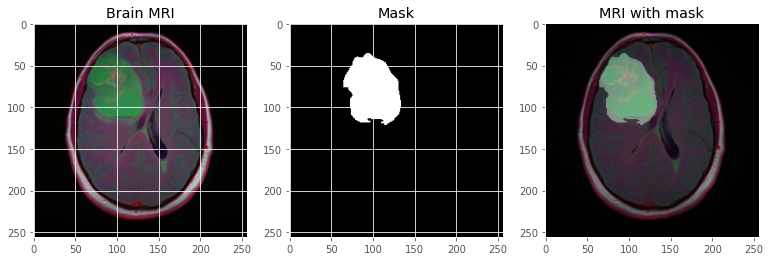

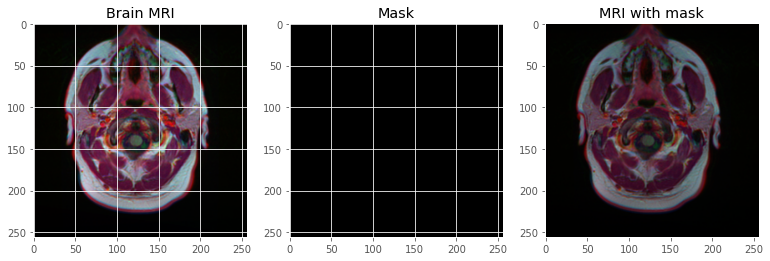

In [8]:
for i in range(3):
    plot_image(i)